In [7]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime
datetime.datetime.strptime
from pandas import to_datetime
import seaborn as sn
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr, iqr


In [8]:
# Legge il CSV
df = pd.read_csv('customer_supermarket.csv', sep='\t', index_col=0)
# Trasforma il campo "Sale" in un float
df["Sale"] = df["Sale"].str.replace(",", ".").astype(float)
# Trasforma il campo "BasketDate" in un datetime
df["BasketDate"] = pd.to_datetime(df["BasketDate"])

df.head()

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


# DATA SEMANTICS



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         471910 non-null  object        
 1   BasketDate       471910 non-null  datetime64[ns]
 2   Sale             471910 non-null  float64       
 3   CustomerID       406830 non-null  float64       
 4   CustomerCountry  471910 non-null  object        
 5   ProdID           471910 non-null  object        
 6   ProdDescr        471157 non-null  object        
 7   Qta              471910 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.4+ MB


Nel dataset si descrivono le sessioni di acquisto di un certo numero di clienti. Una sessione di acquisto, detta basket (`BasketID`) e si svolge in una data (`BasketDate`), e viene effettuata da un cliente (CustomerID) residente in uno stato (`CustomerCountry`).
Ogni sessione rappresenta una serie di prodotti acquistati da un cliente, e in un record è possibile ritrovare, per il singolo prodotto, l’identificativo (`ProdID`), la descrizione (`ProdDescr`), e  la quantità (`Qtà`). Infine viene riportato il costo unitario del prodotto (`Sale`).

# DISTRIBUTION OF VARIABLES AND STATISTICS


In [10]:
df.describe()

,Sale,CustomerID,Qta
count,471910.000000,406830.000000,471910.000000
mean,4.030945,15287.684160,10.716533
std,83.769380,1713.603074,231.355136
min,-11062.060000,12346.000000,-80995.000000
25%,1.250000,13953.000000,1.000000
50%,2.080000,15152.000000,4.000000
75%,3.750000,16791.000000,12.000000
max,38970.000000,18287.000000,80995.000000


In [11]:
print("Distinct Values in BasketID: \n", df.BasketID.nunique())
print("Distinct Values in BasketDate:\n", df.BasketDate.nunique())
print("Distinct Values in Sale: \n", df.Sale.nunique())
print("Distinct Values in CustomerID: \n", df.CustomerID.nunique())
print("Distinct Values in CustomerCountry: \n", df.CustomerCountry.nunique())
print("Distinct Values in ProdID: \n", df.ProdID.nunique())
print("Distinct Values in ProdDescr: \n", df.ProdDescr.nunique())

Distinct Values in BasketID: 
 24627
Distinct Values in BasketDate:
 22428
Distinct Values in Sale: 
 1146
Distinct Values in CustomerID: 
 4372
Distinct Values in CustomerCountry: 
 38
Distinct Values in ProdID: 
 3953
Distinct Values in ProdDescr: 
 4097


## Date e ore di maggiore traffico nei negozi

## Orari di maggiore frequentazione

Di seguito si mostrano i diagrammi a barre contenenti il numero di `BasketID` per ora del giorno.

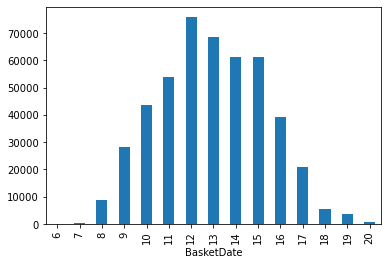

In [12]:
df.groupby(df["BasketDate"].dt.hour)["BasketID"].count().plot(kind="bar")

L'ora del giorno più frequentata sembra essere le 12.

Si restringono le date al 2010 e si osserva come in questo anno l'ora più frequentata siano le 14

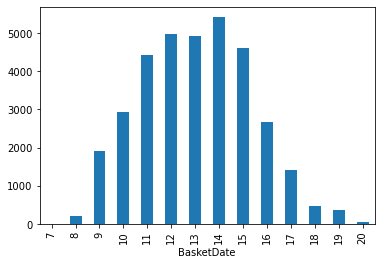

In [32]:
df[df["BasketDate"].dt.year == 2010].groupby(df["BasketDate"].dt.hour)["BasketID"].count().plot(kind="bar")

Mentre nel 2011 l'orario di maggiore frequenza si confermano le 12.

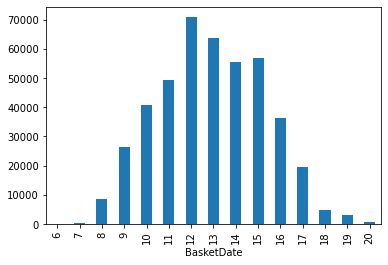

In [33]:
df[df["BasketDate"].dt.year == 2011].groupby(df["BasketDate"].dt.hour)["BasketID"].count().plot(kind="bar")

## Date di maggiore frequentazione

Si mostrano le date di maggiore traffico per gli anni 2010 e 2011

Dato che relativamente al 2010 sono presenti solo 20 record è possibile mostrarli in un unico grafico

20


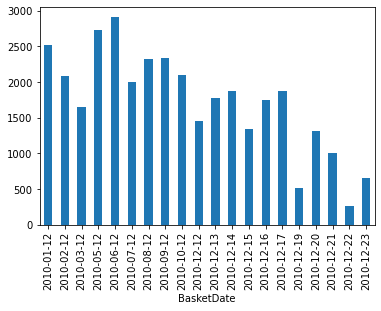

In [9]:
df_2010 = df[df["BasketDate"].dt.year == 2010]

print(df_2010["BasketDate"].dt.date.nunique())

df_2010.groupby(df["BasketDate"].dt.date)["BasketID"].count().plot(kind="bar")

TODO: Grafici per ogni gruppo di mesi del 2011

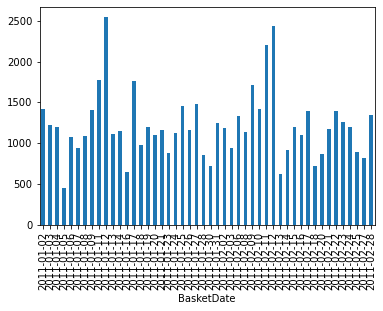

In [10]:
first_three_months = df[(df["BasketDate"].dt.year == 2011) & (df["BasketDate"].dt.month < 3 )]

first_three_months.groupby(df["BasketDate"].dt.date)["BasketID"].count().plot(kind="bar")

## Paesi in cui sono stati effettuati piu acquisti

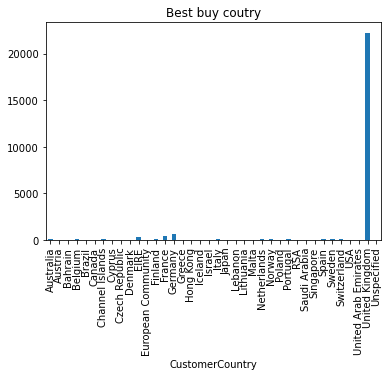

In [11]:
df.groupby('CustomerCountry')["BasketID"].nunique().plot(kind='bar',

title='Best buy coutry')

In [12]:
#verificare a cosa è dovuta la variazione di prezzo
df.groupby(["ProdID",'Qta'])["Sale"].unique()

ProdID        Qta
10002         -3                  [0.0]
               1     [0.85, 1.66, 1.63]
               2     [1.66, 0.85, 1.63]
               3                 [0.85]
               4                 [0.85]
                            ...        
gift_0001_30   1          [25.53, 25.0]
               30                 [0.0]
gift_0001_40   1         [34.04, 33.33]
gift_0001_50   1                [41.67]
m              1                 [2.55]
Name: Sale, Length: 42152, dtype: object

# VARIABLES TRANSFORMATION & GENERATION

## Prezzo nullo

I record con prezzo 0 si considerano missing values, per cui si cerca di recuperare il valore di `Sale` a partire dalla media dei prezzi dello stesso `ProdID`.

In [13]:
df["Sale"] = df.groupby("ProdID")["Sale"].transform(lambda group: group.replace(to_replace=0, method="ffill", value = group.mean()))

## ProdDescr non disponibile

Per rendere più interpretabili certe analisi riteniamo che sia utile recuperare la `ProdDescr` degli elementi che non l'hanno settata. Analogamente al caso precedente, si costruisce una funzione che recupera la descrizione di ogni prodotto dagli altri record.

In [14]:
def replace_first_notna(group: pd.Series, column: str):
    # Indice del primo record con ProdID comune non NaN
    i: int = group.first_valid_index()
    # Se i è None non ci sono ProdDescr valide
    if i is None:
        return group
    # Valore di ProdDescr valido
    value = df.loc[i][column]
    return group.fillna(value)
 
df["ProdDescr"] = df.groupby("ProdID")["ProdDescr"].transform(lambda x: replace_first_notna(x, "ProdDescr"))

## Scaling dei valori

In [ ]:
#FARE PLOT CHE FA VEDEE CHE QTA è GAUSSIANA

In [73]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler1 = MinMaxScaler()
# scaler2= StandardScaler()

# X=scaler1.fit_transform(df[["Sale"]])
# df[["Sale"]]=X

# X=scaler2.fit_transform(df[["Qta"]])
# df[["Qta"]]=X

# df.describe()
# #scaliamo solo questi perche uniche valori quantitativi

,Sale,CustomerID,Qta
count,471910.000000,406830.000000,4.719100e+05
mean,0.221180,15287.684160,-1.058497e-15
std,0.001675,1713.603074,1.000001e+00
min,0.000000,12346.000000,-3.501362e+02
25%,0.221124,13953.000000,-4.199839e-02
50%,0.221141,15152.000000,-2.903130e-02
75%,0.221174,16791.000000,5.547612e-03
max,1.000000,18287.000000,3.500435e+02


# ASSESSING DATA QUALITY (MISSING VALUES, OUTLIERS)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         471910 non-null  object        
 1   BasketDate       471910 non-null  datetime64[ns]
 2   Sale             471910 non-null  float64       
 3   CustomerID       406830 non-null  float64       
 4   CustomerCountry  471910 non-null  object        
 5   ProdID           471910 non-null  object        
 6   ProdDescr        471157 non-null  object        
 7   Qta              471910 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 52.4+ MB


Si osserva che le uniche quantità settate a NaN sono `CustomerID` e le `ProdDescr`. I record che non hanno `CustomerID` non portano informazioni riguardo al profilo del cliente, mentre la `ProdDescr` può essere recuperata dai record con lo stesso `ProdID`.

In [16]:
df = df[~(df["CustomerID"].isnull())]

## Outliers nella quantità (`Qta`)

La distribuzione della quantità segue la seguente distribuzione:

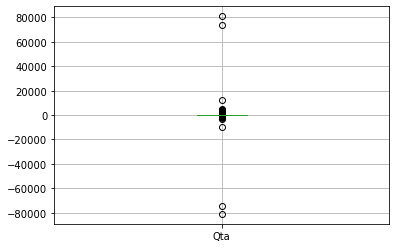

In [17]:
boxplot = df.boxplot(column=['Qta'])

In [32]:
df[df["Qta"]<20000].describe()

,Sale,CustomerID,Qta
count,406828.000000,406828.000000,406828.000000
mean,3.460516,15287.688544,11.679823
std,69.315251,1713.600118,179.426165
min,0.000000,12346.000000,-80995.000000
25%,1.250000,13953.000000,2.000000
50%,1.950000,15152.000000,5.000000
75%,3.750000,16791.000000,12.000000
max,38970.000000,18287.000000,12540.000000


Eliminiamo quindi i record la cui distanza interquartile è troppo alta:

In [18]:
def drop_iqr(column, treshold=1.5):
    global df
    data = df[column]
    Q1 = data.quantile(q = 0.25)
    Q3 = data.quantile(q = 0.75)
    IQR = data.apply(iqr)
    #only keep rows in dataframe that have values within treshold*IQR of Q1 and Q3
    df = df[~((df[column] < (Q1-treshold*IQR)) | (df[column] > (Q3+treshold*IQR)))]
drop_iqr("Qta")

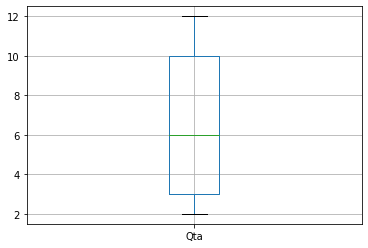

In [19]:
df.boxplot(column=["Qta"])

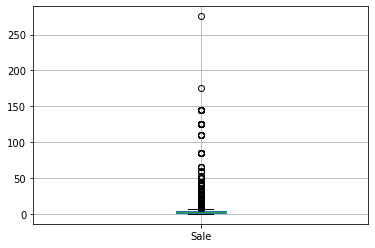

In [20]:
df.boxplot(column=["Sale"])

In [21]:
df[df["Sale"]>200]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
106609,545336,2011-01-03 16:53:00,275.6,12428.0,Finland,M,Manual,2


Boxplot raggruppato per paese

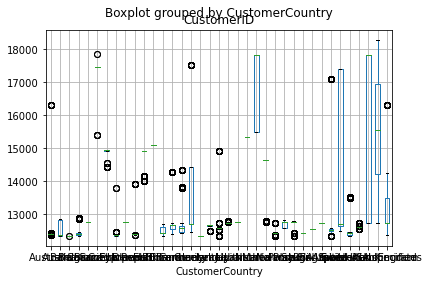

In [36]:
df.boxplot(column=["CustomerID"], by="CustomerCountry")

# Outliers in Sale

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta


# PAIRWISE CORRELATION & ELIMINATION OF REDUNTANT VARIABLES

Si discretizzano le variabili non numeriche all'interno del dataset:

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_copy = df.copy()
for column in {"BasketID", "BasketDate", "CustomerCountry", "ProdID", "ProdDescr"}:
    df_copy[column] = le.fit_transform(df_copy[column].astype(str))

Si definisce la matrice di correlazione tra gli attributi:

In [28]:
df_copy.corr().style.background_gradient(cmap='coolwarm')

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
BasketID,1.000000,0.643295,-0.040810,0.004229,0.002712,0.096869,0.021858,-0.012463
BasketDate,0.643295,1.000000,-0.024189,-0.002167,-0.012139,0.060929,0.015474,-0.001488
Sale,-0.040810,-0.024189,1.000000,-0.055157,-0.081354,0.095727,0.007358,-0.302619
CustomerID,0.004229,-0.002167,-0.055157,1.000000,0.397686,0.006324,0.000121,-0.122757
CustomerCountry,0.002712,-0.012139,-0.081354,0.397686,1.000000,0.011998,-0.007672,-0.122236
ProdID,0.096869,0.060929,0.095727,0.006324,0.011998,1.000000,0.001714,-0.028114
ProdDescr,0.021858,0.015474,0.007358,0.000121,-0.007672,0.001714,1.000000,0.001835
Qta,-0.012463,-0.001488,-0.302619,-0.122757,-0.122236,-0.028114,0.001835,1.000000


Dato che non si osservano correlazioni notevoli (maggiori dell'80%) non è il caso di eliminare attributi ridondanti.

In [29]:
df.to_csv("./preprocessed.csv")

# DATA PREPARATION

Costruzione di attributi che caratterizzano il comportamento di un utente.

Si caricano i dati preprocessati, considerando per ora solo quelli con `CustomerID` non nullo:

In [50]:
df = pd.read_csv("./preprocessed.csv", index_col=0)
df = df[~(df["CustomerID"].isnull())]
df["BasketDate"] = pd.to_datetime(df["BasketDate"])
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
541904,581587,2011-09-12 12:50:00,0.85,12680.0,France,22613,PACK OF 20 SPACEBOY NAPKINS,12
541905,581587,2011-09-12 12:50:00,2.10,12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
541906,581587,2011-09-12 12:50:00,4.15,12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
541907,581587,2011-09-12 12:50:00,4.15,12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4


In [51]:
from indicators import customer_features

customer_indicators = df.groupby("CustomerID").apply(customer_features)
customer_indicators = pd.DataFrame(customer_indicators.values.tolist(), index=customer_indicators.index)
customer_indicators

,I,Iu,spending,Imax,avg_bought,baskets,E
CustomerID,,,,,,,
12347.0,164.571429,12.285714,416.905714,330,3.137986,7,6.217788
12348.0,6.000000,1.000000,240.000000,6,40.000000,1,0.000000
12349.0,465.000000,63.000000,1233.910000,465,3.714603,1,5.786721
12350.0,172.000000,15.000000,274.000000,172,1.630000,1,3.891479
12352.0,68.857143,7.857143,214.991429,103,5.148158,7,5.454556
...,...,...,...,...,...,...,...
18280.0,45.000000,10.000000,180.600000,45,4.765000,1,3.207542
18281.0,52.000000,5.000000,46.920000,52,1.092000,1,2.281445
18282.0,26.500000,4.500000,69.315000,28,4.066667,2,2.962478


In [52]:
customer_indicators.describe()

,I,Iu,spending,Imax,avg_bought,baskets,E
count,4150.000000,4150.000000,4150.000000,4150.000000,4150.000000,4150.000000,4150.000000
mean,101.228624,13.745575,232.548074,146.372048,3.419600,3.940000,4.363661
std,86.226957,12.247100,203.760553,127.699879,4.274995,6.699954,1.643364
min,2.000000,0.200000,0.840000,2.000000,0.347500,1.000000,0.000000
25%,47.000000,6.000000,108.991250,61.000000,2.190041,1.000000,3.321256
50%,82.000000,10.732143,184.641771,115.000000,2.959688,2.000000,4.454893
75%,131.661765,17.666667,299.090536,194.000000,3.878626,4.000000,5.546482
max,1507.000000,202.000000,3343.190000,1507.000000,145.000000,191.000000,9.891737


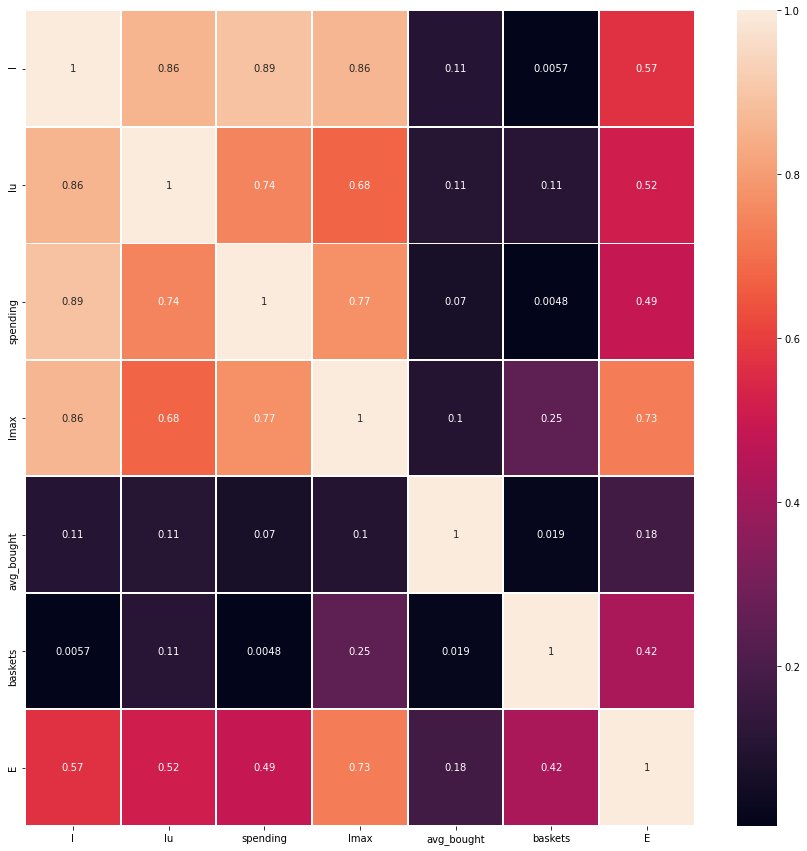

,I,Iu,spending,Imax,avg_bought,baskets,E
I,1.000000,0.857035,0.891570,0.860799,0.105598,0.005706,0.569257
Iu,0.857035,1.000000,0.743712,0.676608,0.108110,0.112878,0.516087
spending,0.891570,0.743712,1.000000,0.774020,0.069966,0.004818,0.489669
Imax,0.860799,0.676608,0.774020,1.000000,0.099773,0.248725,0.731077
avg_bought,0.105598,0.108110,0.069966,0.099773,1.000000,0.018727,0.178723
baskets,0.005706,0.112878,0.004818,0.248725,0.018727,1.000000,0.421316
E,0.569257,0.516087,0.489669,0.731077,0.178723,0.421316,1.000000


In [53]:
customer_indicators.corr()


fig, ax = plt.subplots(figsize=(15,15))         #

sn.heatmap(customer_indicators.corr().abs(), annot=True, linewidths=.9, ax=ax)
plt.savefig('./correlationMatrixImage.png')
plt.show()

customer_indicators.corr().abs().style.background_gradient(cmap='coolwarm')



In [54]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler1 = MinMaxScaler()
scaler2= StandardScaler()



customer_indicators[customer_indicators.columns]=scaler1.fit_transform(customer_indicators)




In [55]:
customer_indicators

,I,Iu,spending,Imax,avg_bought,baskets,E
CustomerID,,,,,,,
12347.0,0.108021,0.059890,0.124483,0.217940,0.019291,0.031579,0.628584
12348.0,0.002658,0.003964,0.071554,0.002658,0.274122,0.000000,0.000000
12349.0,0.307641,0.311199,0.368923,0.307641,0.023277,0.000000,0.585006
12350.0,0.112957,0.073340,0.081727,0.112957,0.008866,0.000000,0.393407
12352.0,0.044423,0.037944,0.064072,0.067110,0.033188,0.031579,0.551425
...,...,...,...,...,...,...,...
18280.0,0.028571,0.048563,0.053783,0.028571,0.030539,0.000000,0.324265
18281.0,0.033223,0.023786,0.013787,0.033223,0.005147,0.000000,0.230642
18282.0,0.016279,0.021308,0.020487,0.017276,0.025711,0.005263,0.299490


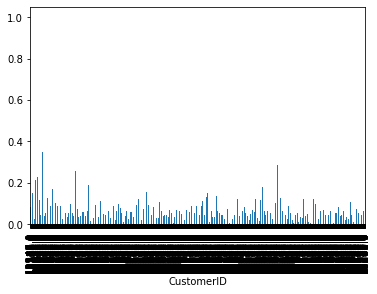

In [56]:
customer_indicators["spending"].plot.bar()

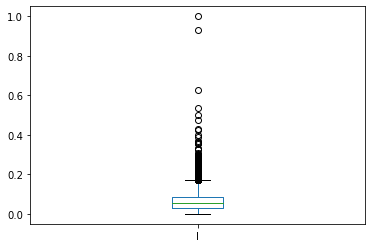

In [57]:
customer_indicators["I"].plot.box()

In [76]:
customer_indicators=customer_indicators[customer_indicators["I"]<0.8]

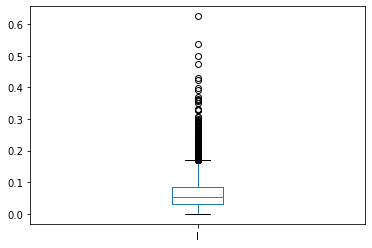

In [77]:
customer_indicators["I"].plot.box()

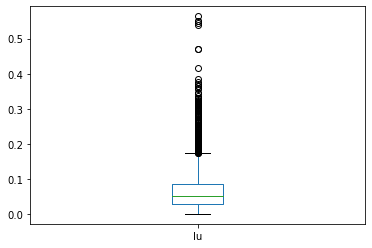

In [78]:
customer_indicators["Iu"].plot.box()

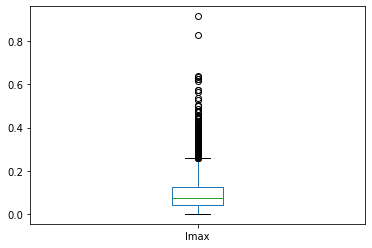

In [79]:
customer_indicators["Imax"].plot.box()

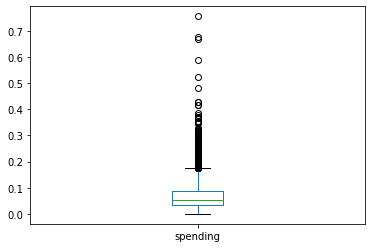

In [80]:
customer_indicators["spending"].plot.box()

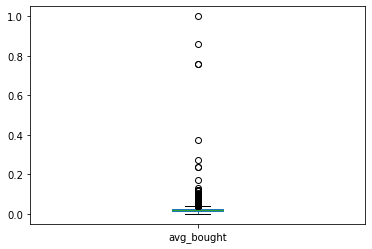

In [81]:
customer_indicators["avg_bought"].plot.box()

In [84]:
customer_indicators=customer_indicators[customer_indicators["avg_bought"]<0.6]

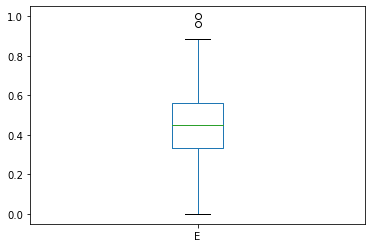

In [85]:
customer_indicators["E"].plot.box()

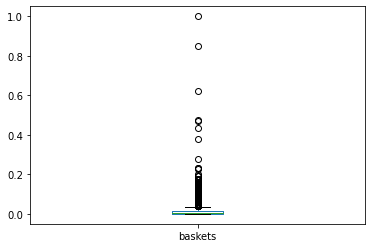

In [86]:
customer_indicators["baskets"].plot.box()

In [87]:

#svm GIA
#bayes MATTEO
#random forest MATTEO
#knn GIA

In [ ]:
#FINO A QUA TIENI

Preprocessing Dati per clustering

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics

le = LabelEncoder()

#prendo una copia di customer_indicators 
CICopy = customer_indicators.copy()

#CODIFICO COUNTRY
CICopy['best_country'] = le.fit_transform(CICopy['best_country'])
#FILL NAN
CICopy=CICopy.fillna(0)


CICopy.corr().style.background_gradient(cmap='coolwarm')

,I,Iu,spending,Imax,best_country,max_cost,min_cost,avg_bought,avg_returned,hour,month,baskets,E
I,1.000000,-0.825023,-0.379560,0.105085,-0.015597,-0.081848,-0.058422,-0.081770,-0.057229,-0.058905,-0.038838,-0.666142,-0.227945
Iu,-0.825023,1.000000,0.672881,-0.096628,-0.045155,0.187623,0.102925,0.187455,0.100785,0.036878,0.026582,0.722654,0.532001
spending,-0.379560,0.672881,1.000000,0.121446,-0.109967,0.155152,0.046593,0.154935,0.045075,-0.040565,-0.009223,0.686743,0.521856
Imax,0.105085,-0.096628,0.121446,1.000000,-0.022452,0.083379,-0.101469,0.083295,-0.101399,-0.120110,-0.049824,0.169626,0.190399
best_country,-0.015597,-0.045155,-0.109967,-0.022452,1.000000,-0.049979,-0.021167,-0.049931,-0.020050,0.072941,0.008386,-0.026049,-0.119998
max_cost,-0.081848,0.187623,0.155152,0.083379,-0.049979,1.000000,-0.054649,1.000000,-0.055537,-0.048952,0.004913,0.130257,0.514575
min_cost,-0.058422,0.102925,0.046593,-0.101469,-0.021167,-0.054649,1.000000,-0.054673,0.999968,0.027237,-0.007703,0.060055,0.101299
avg_bought,-0.081770,0.187455,0.154935,0.083295,-0.049931,1.000000,-0.054673,1.000000,-0.055560,-0.048912,0.004934,0.130057,0.514356
avg_returned,-0.057229,0.100785,0.045075,-0.101399,-0.020050,-0.055537,0.999968,-0.055560,1.000000,0.027369,-0.007686,0.058601,0.099255
hour,-0.058905,0.036878,-0.040565,-0.120110,0.072941,-0.048952,0.027237,-0.048912,0.027369,1.000000,0.044645,-0.018102,-0.104502


# Prima esecuzione del k-means
si sceglie un sottoinsieme di 8 attributi: (I, Iu, Imax, returning, baskets, E, hour, month) per ridurre la dimensione dello spazio e verificare i risultati ottenuti.
Non vengono prese coppie di attributi con correlazione > 0.8

In [21]:
#prendo sottoinsieme del dataset
CICopyClustering=CICopy.iloc[:][["I", "Iu", "Imax", "baskets", "E", "hour", "month"]]

# applico MinMaxScaler, in quanto non avendo una distribuzione normale dei dati
# usando la normalizzazione standard si perde la distribuzione originale dei dati
# scaler = MinMaxScaler()

# X=scaler.fit_transform(CICopyClustering) 
X=CICopyClustering.values
CICopyClustering.corr().style.background_gradient(cmap='coolwarm')



,I,Iu,Imax,baskets,E,hour,month
I,1.000000,-0.825023,0.105085,-0.666142,-0.227945,-0.058905,-0.038838
Iu,-0.825023,1.000000,-0.096628,0.722654,0.532001,0.036878,0.026582
Imax,0.105085,-0.096628,1.000000,0.169626,0.190399,-0.120110,-0.049824
baskets,-0.666142,0.722654,0.169626,1.000000,0.387173,-0.018102,-0.009748
E,-0.227945,0.532001,0.190399,0.387173,1.000000,-0.104502,-0.009747
hour,-0.058905,0.036878,-0.120110,-0.018102,-0.104502,1.000000,0.044645
month,-0.038838,0.026582,-0.049824,-0.009748,-0.009747,0.044645,1.000000


# K-means 

# Subtask 1.1: identificazione del valore K

K: 2
SSE 104.01155603684381
Silhouette 0.4244403710887212
Separation 0.8458572455910471 

K: 3
SSE 75.21637002141377
Silhouette 0.37360262975268616
Separation 0.9421999864608112 

K: 4
SSE 59.72132937298426
Silhouette 0.3620724984154996
Separation 0.9388270317650649 

K: 5
SSE 51.028794803378254
Silhouette 0.3323716842623972
Separation 0.9519900889454194 

K: 10
SSE 31.194257467708624
Silhouette 0.2963833762500894
Separation 0.9598412801417252 

K: 15
SSE 22.11060960480668
Silhouette 0.28798444528247474
Separation 0.9411348289387397 

K: 20
SSE 17.93171555127873
Silhouette 0.2685810074934656
Separation 1.0023650438276688 



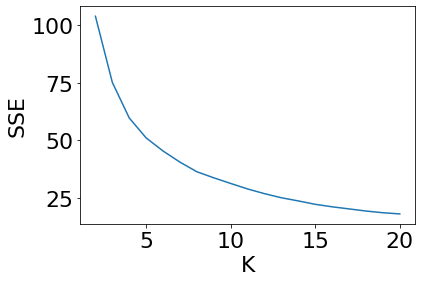

[104.01155603684381, 75.21637002141377, 59.72132937298426, 51.028794803378254, 45.33112359290179, 40.47676971908498, 36.29068472348105, 33.65137235600512, 31.194257467708624, 28.80460168309603, 26.746942979123666, 24.96139161062496, 23.587776802706525, 22.11060960480668, 21.023137041300792, 20.11423793810514, 19.186252630792932, 18.44441884628832, 17.93171555127873]


In [64]:
from sklearn.cluster import KMeans
from sklearn import metrics
sse_list = list()
max_k = 20
start_k=2
for k in range(start_k, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=30, max_iter=100)
    kmeans.fit(customer_indicators)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    
    if((k%5==0) or k<5):
        print("K: "+str(k))
        print('SSE %s' % kmeans.inertia_)
        print('Silhouette %s' % metrics.silhouette_score(customer_indicators, kmeans.labels_))
        print('Separation %s \n' % metrics.davies_bouldin_score(customer_indicators, kmeans.labels_))
        

plt.plot(range(start_k, max_k + 1), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()


print(sse_list)

guardando la curva dell'SSE al variare di K, vediamo che il valore smette di decrescere rapidamente dopo K>5.
Si sceglie però K=3, perche negli esperimenti fatti con K=4,5 si ottenevano centroidi quasi del tutto sovrapposti, che non riportavano quindi alcuna informazione di classificazione, cosa che non accade invece con K=3.   

In [65]:
kmeans = KMeans(n_clusters=3, n_init=30, max_iter=100)
kmeans.fit(customer_indicators)
    

print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % metrics.silhouette_score(customer_indicators, kmeans.labels_))
print('Separation %s \n' % metrics.davies_bouldin_score(customer_indicators, kmeans.labels_))

SSE 75.21700224979412
Silhouette 0.3733241301787588
Separation 0.9420334107594255 



# Subtask 1.2: descrizione dei cluster ottenuti

In [66]:
#centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers = (kmeans.cluster_centers_)

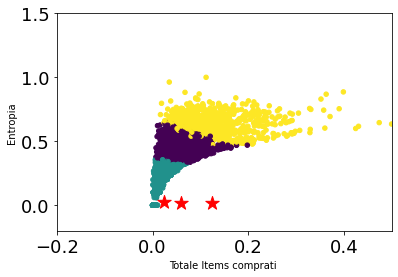

In [74]:
plt.scatter(customer_indicators['I'], customer_indicators['E'],s=20,c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:,4], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(-0.2, 0.5)
plt.ylim(-0.2,1.5)
plt.xlabel('Totale Items comprati ')
plt.ylabel('Entropia')
plt.show()

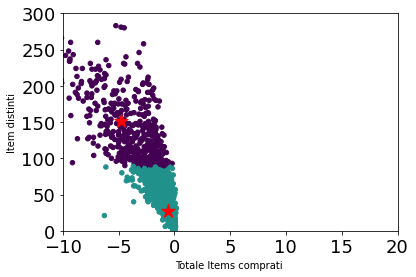

In [38]:
plt.scatter(CICopyClustering['I'], CICopyClustering['Iu'],s=20,c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(-10, 20)
plt.ylim(-0,300)
plt.xlabel('Totale Items comprati ')
plt.ylabel('Item distinti')
plt.show()

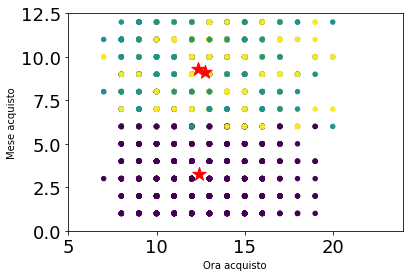

In [153]:
plt.scatter(CICopyClustering['hour'], CICopyClustering['month'],s=20,c=kmeans.labels_)
plt.scatter(centers[:, 6], centers[:, 7], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(5, 24)
plt.ylim(-0,12.5)
plt.xlabel('Ora acquisto ')
plt.ylabel('Mese acquisto')
plt.show()

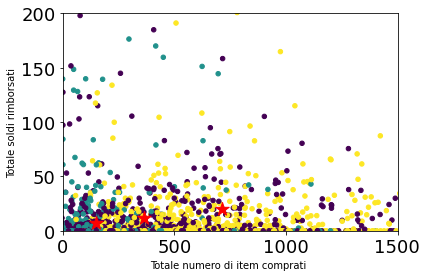

In [154]:
plt.scatter(CICopyClustering['I'], CICopyClustering['returning'],s=20,c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(-1, 1500)
plt.ylim(-0,200)
plt.xlabel('Totale numero di item comprati ')
plt.ylabel('Totale soldi rimborsati')
plt.show()

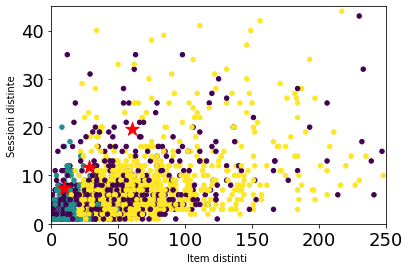

In [155]:
plt.scatter(CICopyClustering['Iu'], CICopyClustering['baskets'],s=20,c=kmeans.labels_)
plt.scatter(centers[:, 1], centers[:, 3], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(-0, 250)
plt.ylim(-0,45)
plt.xlabel('Item distinti ')
plt.ylabel('Sessioni distinte')
plt.show()

In [156]:
kmeans.cluster_centers_

array([[0.0784344 , 0.05523883, 0.08976857, 0.00570511, 0.02550924,
        0.46465147, 0.41431324, 0.20475371],
       [0.05131719, 0.01686644, 0.07936895, 0.00356778, 0.00859304,
        0.32217142, 0.41188082, 0.75534009],
       [0.12189802, 0.12053784, 0.10764844, 0.00950871, 0.04690826,
        0.65537767, 0.44343542, 0.73667228]])

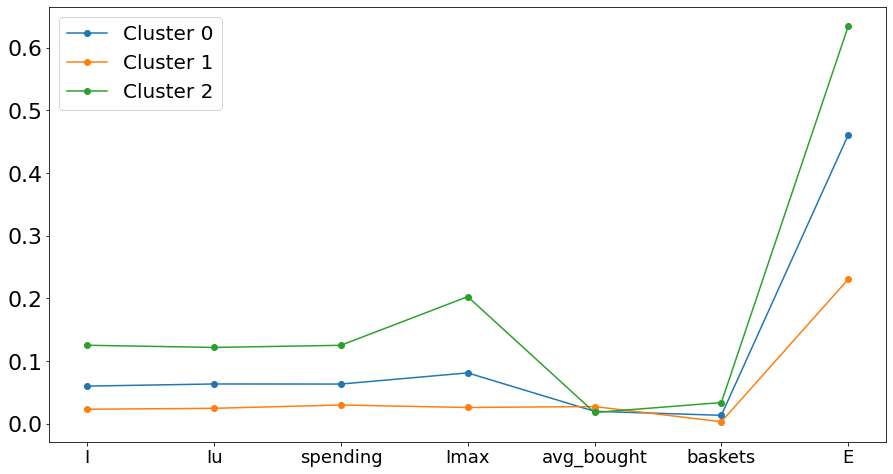

In [75]:
plt.figure(figsize=(15, 8))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(customer_indicators.columns)), customer_indicators.columns, fontsize=18)
plt.legend(fontsize=20)
plt.show()

Zoom nella parte bassa del grafico

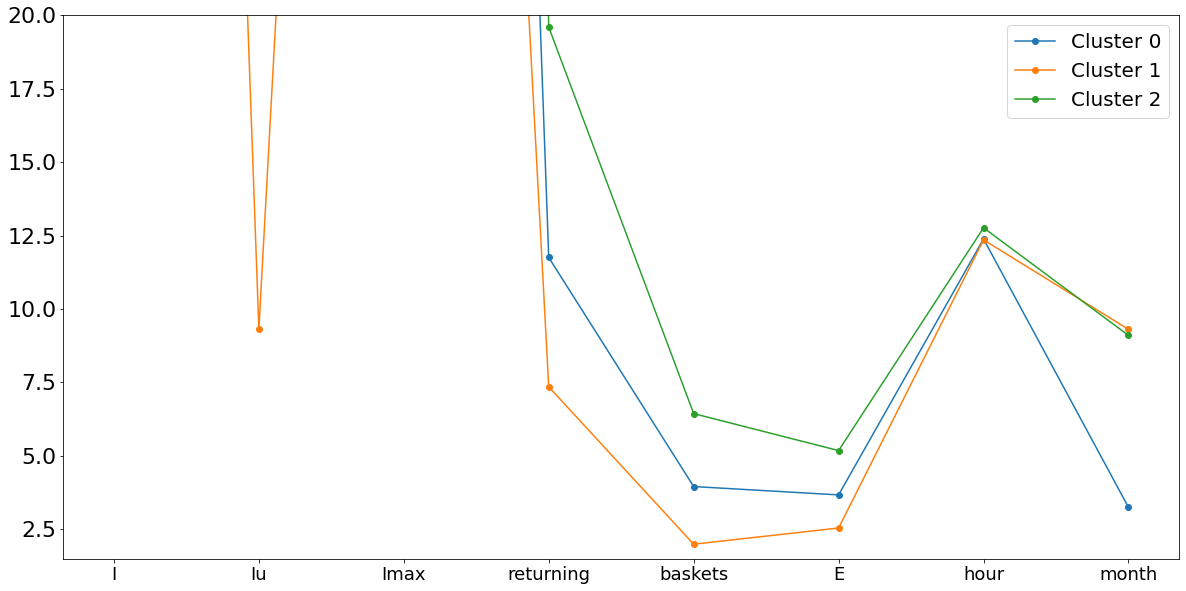

In [158]:
plt.figure(figsize=(20, 10))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(CICopyClustering.columns)), CICopyClustering.columns, fontsize=18)
plt.legend(fontsize=20)
plt.ylim(1.5,20)
plt.show()

# Seconda esecuzione del k-means
si sceglie un sottoinsieme di 6 attributi: (I, Iu, Imax, most_bought_cost, avg_bought, E,) per ridurre ulteriormente la dimensione dello spazio e se si ottiene una classificazione diversa prendendo un sottoinsieme differente.
Non vengono prese coppie di attributi con correlazione > 0.8

In [38]:
#prendo sottoinsieme del dataset
CICopyClustering=CICopy.iloc[:][["I","Iu","Imax","most_bought_cost","avg_bought","E"]]

# applico MinMaxScaler, in quanto non avendo una distribuzione normale dei dati
# usando la normalizzazione standard si perderebbe la distribuzione originale dei dati
scaler = MinMaxScaler()

X=scaler.fit_transform(CICopyClustering) 
CICopyClustering.corr().style.background_gradient(cmap='coolwarm')

,I,Iu,Imax,most_bought_cost,avg_bought,E
I,1.000000,0.530615,0.707347,-0.047928,-0.030157,0.423775
Iu,0.530615,1.000000,0.296171,-0.132364,-0.035532,0.778808
Imax,0.707347,0.296171,1.000000,-0.074933,-0.052056,0.307470
most_bought_cost,-0.047928,-0.132364,-0.074933,1.000000,0.668207,-0.116143
avg_bought,-0.030157,-0.035532,-0.052056,0.668207,1.000000,-0.013734
E,0.423775,0.778808,0.307470,-0.116143,-0.013734,1.000000


# Subtask 2.1: identificazione del valore K

K: 2
SSE 290.9607179081443
Silhouette 0.41997762123274635
Separation 1.0188041501896739 

K: 3
SSE 192.7354807072745
Silhouette 0.36370536331047687
Separation 0.9529479245704291 

K: 4
SSE 159.38900412679308
Silhouette 0.3226170517891067
Separation 0.9975747776742645 

K: 5
SSE 134.9634800010123
Silhouette 0.3178139817677865
Separation 1.0581420950830984 

K: 10
SSE 86.24402429830945
Silhouette 0.2919285877326198
Separation 0.9996005995293485 

K: 15
SSE 63.91168475432108
Silhouette 0.2805565122162622
Separation 1.0133429188566425 

K: 20
SSE 51.52906731918323
Silhouette 0.2755737734668294
Separation 1.013889031445681 



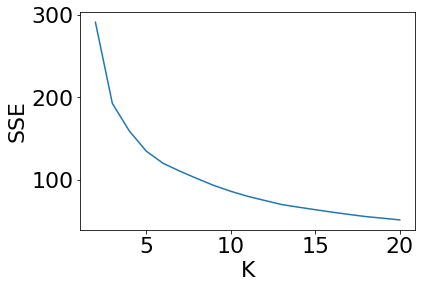

[290.9607179081443, 192.7354807072745, 159.38900412679308, 134.9634800010123, 120.16540355163329, 110.50965502186648, 101.71193369662923, 93.29574440054135, 86.24402429830945, 80.15043333970445, 75.13509481763943, 70.2269216645572, 66.97864785109098, 63.91168475432108, 60.94271735337585, 58.161477062338776, 55.53069058813944, 53.60964262807193, 51.52906731918323]


In [160]:
sse_list = list()
max_k = 20
start_k=2
for k in range(start_k, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=30, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    
    if((k%5==0) or k<5):
        print("K: "+str(k))
        print('SSE %s' % kmeans.inertia_)
        print('Silhouette %s' % metrics.silhouette_score(X, kmeans.labels_))
        print('Separation %s \n' % metrics.davies_bouldin_score(X, kmeans.labels_))
        

plt.plot(range(start_k, max_k + 1), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()


print(sse_list)

guardando la curva dell'SSE al variare di K, vediamo che il valore smette di decrescere rapidamente dopo K>5.
Si sceglie però K=3, perche negli esperimenti fatti con K=4,5 si ottenevano centroidi quasi del tutto sovrapposti, che non riportavano quindi alcuna informazione di classificazione, cosa che non accade invece con K=3.   

In [161]:
kmeans = KMeans(n_clusters=3, n_init=30, max_iter=100)
kmeans.fit(X)
    

print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % metrics.silhouette_score(X, kmeans.labels_))
print('Separation %s \n' % metrics.davies_bouldin_score(X, kmeans.labels_))

SSE 192.73544272800152
Silhouette 0.36370536331047687
Separation 0.9529479245704291 



# Subtask 2.2: descrizione dei cluster ottenuti

In [162]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

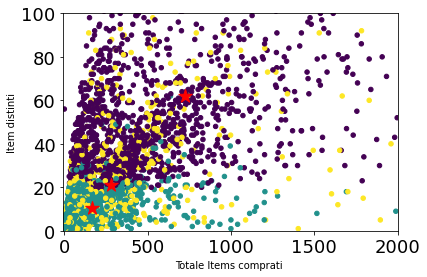

In [166]:
plt.scatter(CICopyClustering['I'], CICopyClustering['Iu'],s=20,c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(-10, 2000)
plt.ylim(-0,100)
plt.xlabel('Totale Items comprati ')
plt.ylabel('Item distinti')
plt.show()

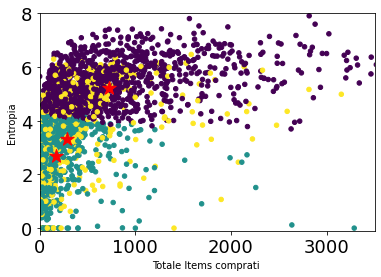

In [176]:
plt.scatter(CICopyClustering['I'], CICopyClustering['E'],s=20,c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:, 5], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(-0, 3500)
plt.ylim(-0.1,8)
plt.xlabel('Totale Items comprati ')
plt.ylabel('Entropia')
plt.show()

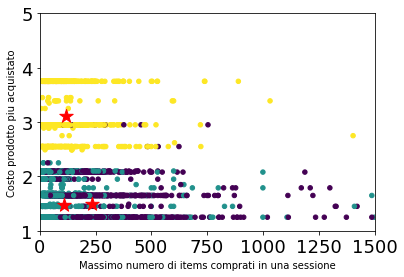

In [184]:
plt.scatter(CICopyClustering['Imax'], CICopyClustering['most_bought_cost'],s=20,c=kmeans.labels_)
plt.scatter(centers[:, 2], centers[:, 3], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(-0, 1500)
plt.ylim(1,5)
plt.xlabel('Massimo numero di items comprati in una sessione')
plt.ylabel('Costo prodotto piu acquistato')
plt.show()

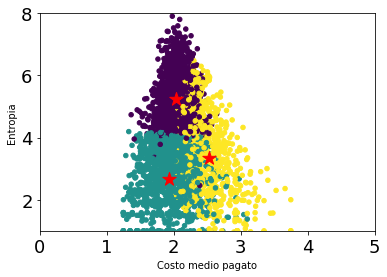

In [187]:
plt.scatter(CICopyClustering['avg_bought'], CICopyClustering['E'],s=20,c=kmeans.labels_)
plt.scatter(centers[:, 4], centers[:, 5], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(-0, 5)
plt.ylim(1,8)
plt.xlabel('Costo medio pagato')
plt.ylabel('Entropia')
plt.show()

In [188]:
kmeans.cluster_centers_

array([[0.1233018 , 0.12333583, 0.10853786, 0.39606741, 0.5445306 ,
        0.66154739],
       [0.05379642, 0.01881647, 0.08122483, 0.39402145, 0.51680551,
        0.33862097],
       [0.06829951, 0.04096672, 0.08306014, 0.83179697, 0.67487827,
        0.4210407 ]])

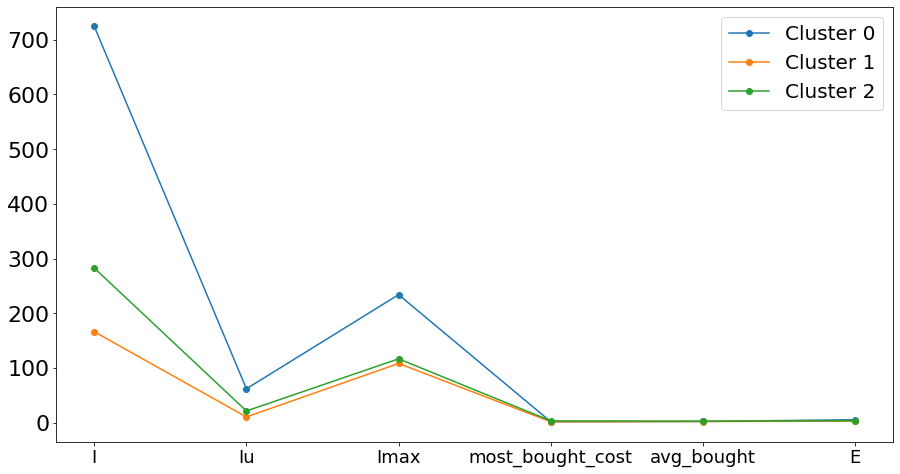

In [189]:
plt.figure(figsize=(15, 8))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(CICopyClustering.columns)), CICopyClustering.columns, fontsize=18)
plt.legend(fontsize=20)
plt.show()

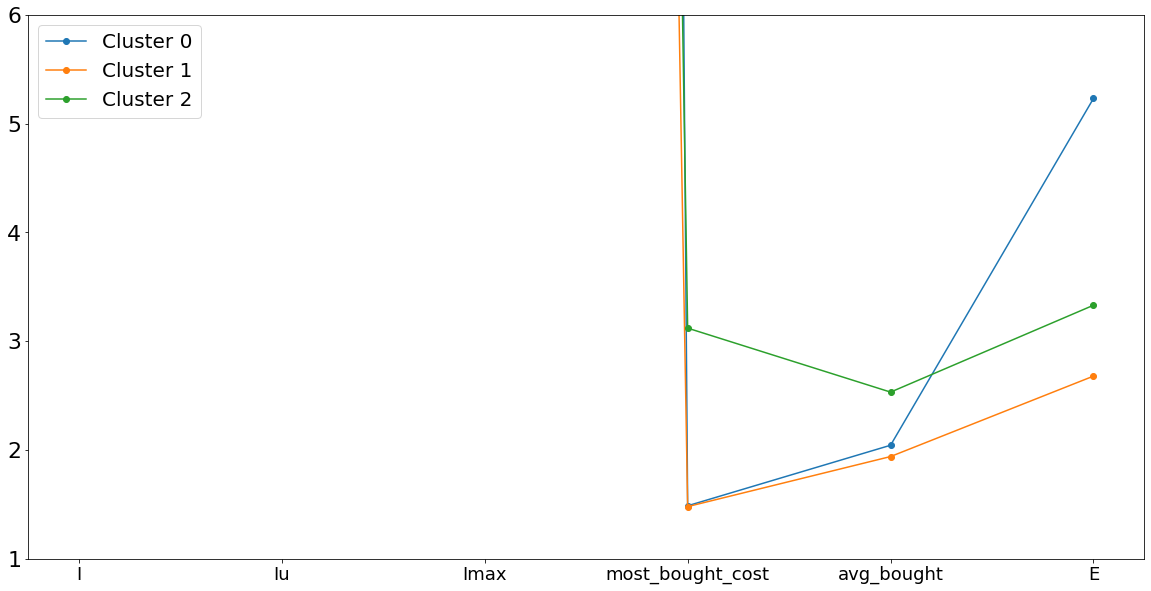

In [201]:
plt.figure(figsize=(20, 10))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(CICopyClustering.columns)), CICopyClustering.columns, fontsize=18)
plt.legend(fontsize=20)
plt.ylim(1,6)

plt.show()

# Density based clustering

# Prima esecuzione 


In [202]:
CICopyDensityBased=CICopy.iloc[:][["I", "Iu", "Imax", "returning", "baskets", "E", "hour", "month"]]
scaler = MinMaxScaler()

X=scaler.fit_transform(CICopyDensityBased) 

# SubTask 3.1: study of clustering parameters

In [16]:
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform

dist = pdist(X, 'euclidean') 
dist = squareform(dist) 
dist.shape

(4180, 4180)

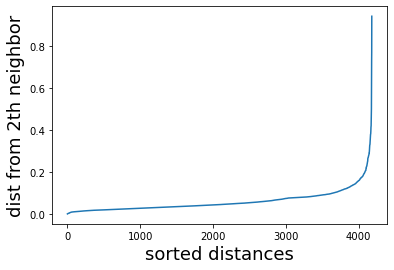

K = 2 
k-dist del 4000-esimo punto 0.15934471589414154: 
k-dist del 3000-esimo punto 0.07421883273530644: 


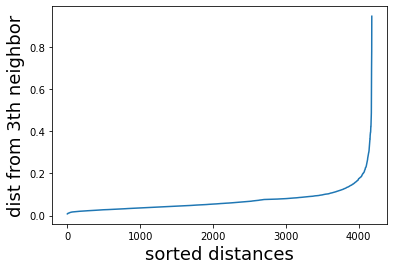

K = 3 
k-dist del 4000-esimo punto 0.17558107492572625: 
k-dist del 3000-esimo punto 0.08048949095740052: 


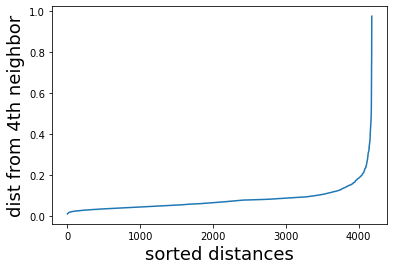

K = 4 
k-dist del 4000-esimo punto 0.18433382124696573: 
k-dist del 3000-esimo punto 0.08631436562997441: 


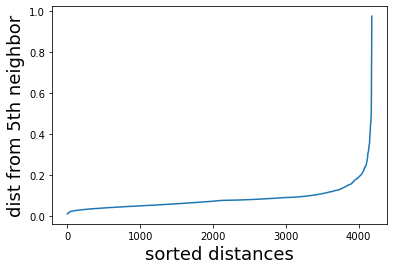

K = 5 
k-dist del 4000-esimo punto 0.19067546652304707: 
k-dist del 3000-esimo punto 0.09094803966047339: 


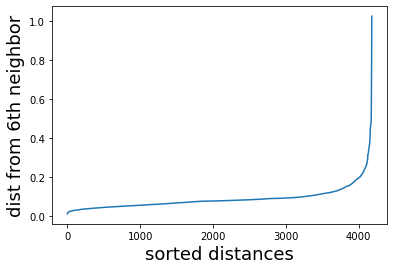

K = 6 
k-dist del 4000-esimo punto 0.1959342902057446: 
k-dist del 3000-esimo punto 0.09350789234387849: 


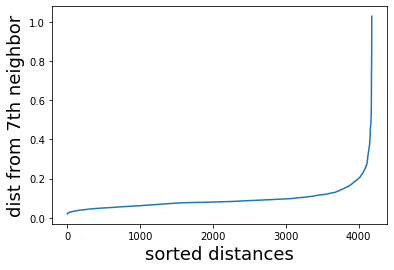

K = 7 
k-dist del 4000-esimo punto 0.20167921659469598: 
k-dist del 3000-esimo punto 0.09684000497070841: 


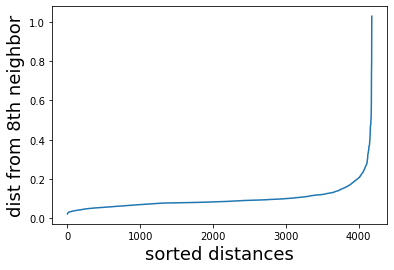

K = 8 
k-dist del 4000-esimo punto 0.2055305772533702: 
k-dist del 3000-esimo punto 0.09963101803170928: 


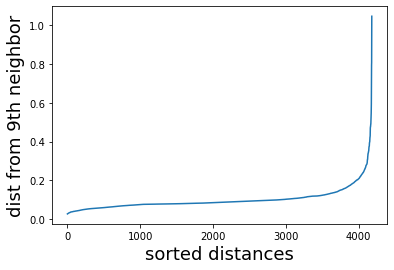

K = 9 
k-dist del 4000-esimo punto 0.20875139490334224: 
k-dist del 3000-esimo punto 0.10300265783079349: 


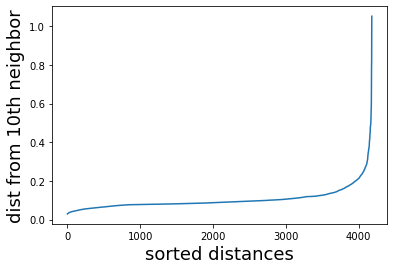

K = 10 
k-dist del 4000-esimo punto 0.21311563237165848: 
k-dist del 3000-esimo punto 0.10614456171374172: 


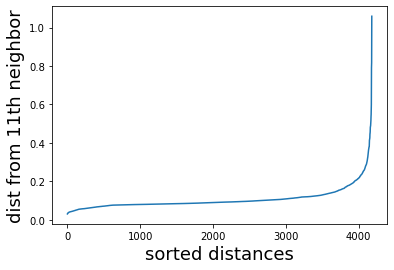

K = 11 
k-dist del 4000-esimo punto 0.21735512122684084: 
k-dist del 3000-esimo punto 0.1085180724547328: 


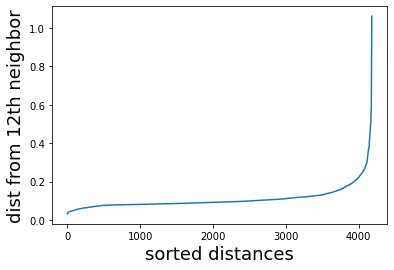

K = 12 
k-dist del 4000-esimo punto 0.2224558920528251: 
k-dist del 3000-esimo punto 0.11105146959697647: 


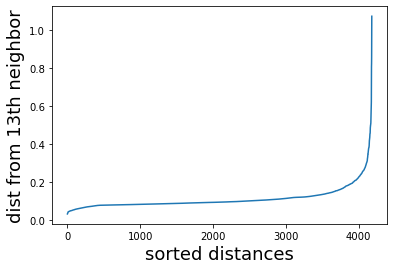

K = 13 
k-dist del 4000-esimo punto 0.22565249094218362: 
k-dist del 3000-esimo punto 0.11354406886489286: 


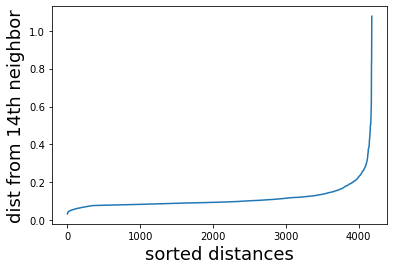

K = 14 
k-dist del 4000-esimo punto 0.2287756191668796: 
k-dist del 3000-esimo punto 0.11600563951439864: 


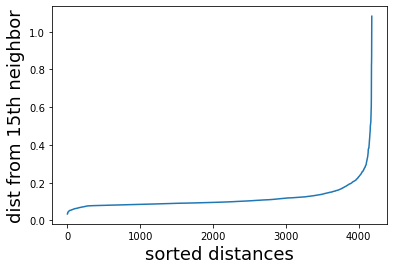

K = 15 
k-dist del 4000-esimo punto 0.23191046717839836: 
k-dist del 3000-esimo punto 0.11848763390431816: 


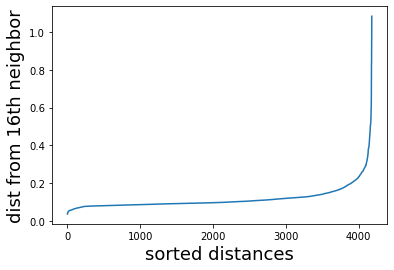

K = 16 
k-dist del 4000-esimo punto 0.23393337350186183: 
k-dist del 3000-esimo punto 0.11934195991833697: 


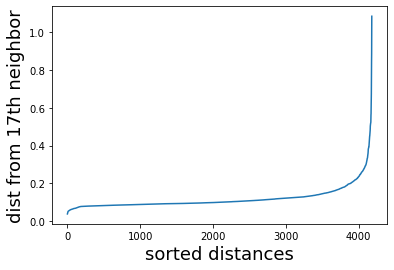

K = 17 
k-dist del 4000-esimo punto 0.23578805544771522: 
k-dist del 3000-esimo punto 0.12078869355295675: 


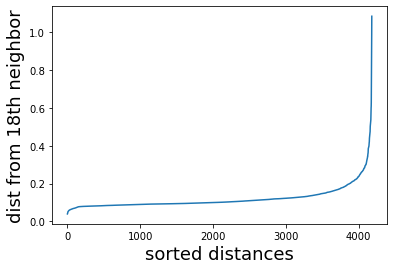

K = 18 
k-dist del 4000-esimo punto 0.23808750153532696: 
k-dist del 3000-esimo punto 0.12207152989409255: 


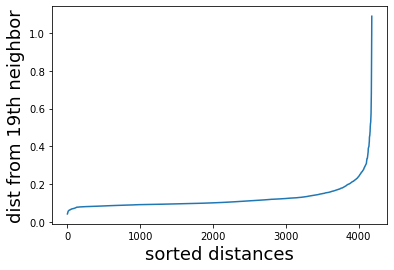

K = 19 
k-dist del 4000-esimo punto 0.2408662850961164: 
k-dist del 3000-esimo punto 0.1233681075456045: 


In [380]:
for k in range(2,20):

    
    kth_distances = list()
    for d in dist:
        index_kth_distance = np.argsort(d)[k] #indice della distanza che ordinata è in posizione k
        kth_distances.append(d[index_kth_distance])

        
    kth_distances=sorted(kth_distances)

    
    plt.plot(range(0, len(kth_distances)), kth_distances)
    plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
    plt.xlabel('sorted distances', fontsize=18)
    plt.show()
    
    print("K = %d " % k)
    print("k-dist del 4000-esimo punto %s: " % kth_distances[4000])
    print("k-dist del 3000-esimo punto %s: " % kth_distances[3000])

# Subtask 3.2: cluster analysys

In [397]:
dbscan = DBSCAN(eps=0.209, min_samples=8)
dbscan.fit(X)

print('Silhouette %s' % metrics.silhouette_score(X, dbscan.labels_))

Silhouette 0.3426833314920074


In [398]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0], dtype=int64), array([  77, 4103], dtype=int64))

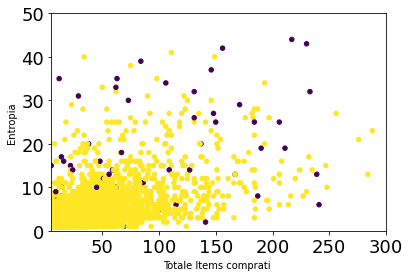

In [399]:
plt.scatter(CICopyDensityBased['Iu'], CICopyDensityBased['baskets'],s=20,c=dbscan.labels_)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(5, 300)
plt.ylim(0,50)
plt.xlabel('Totale Items comprati ')
plt.ylabel('Entropia')
plt.show()

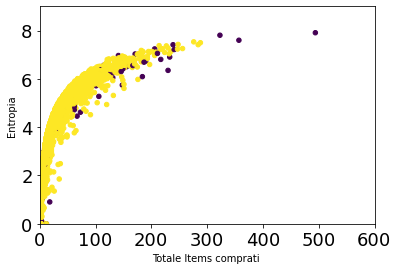

In [408]:
plt.scatter(CICopyDensityBased['Iu'], CICopyDensityBased['E'],s=20,c=dbscan.labels_)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(-0, 600)
plt.ylim(0,9)
plt.xlabel('Totale Items comprati ')
plt.ylabel('Entropia')
plt.show()

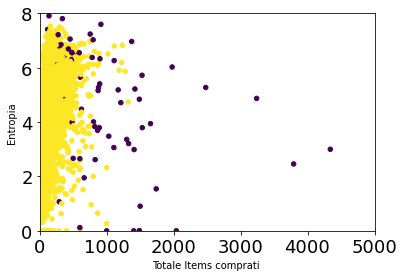

In [402]:
plt.scatter(CICopyDensityBased['Imax'], CICopyDensityBased['E'],s=20,c=dbscan.labels_)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(-0, 5000)
plt.ylim(0,8)
plt.xlabel('Totale Items comprati ')
plt.ylabel('Entropia')
plt.show()

la dimensione dello spazio elevata e l'alta densità dei punti fa si che si genera quasi un solo cluster

# Seconda esecuzione
    

# Subtask 4.1 study of clustering parameters

In [17]:
CICopyDensityBased=CICopy.iloc[:][["I","Iu","Imax","most_bought_cost","avg_bought","E"]]
scaler = MinMaxScaler()

X=scaler.fit_transform(CICopyDensityBased) 

In [18]:
dist = pdist(X, 'euclidean') 
dist = squareform(dist) 
dist.shape

(4180, 4180)

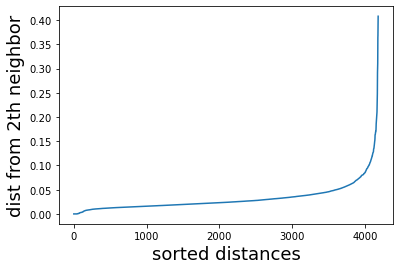

K = 2 
k-dist del 4000-esimo punto 0.08616869519612513: 
k-dist del 3000-esimo punto 0.03496422263773274: 


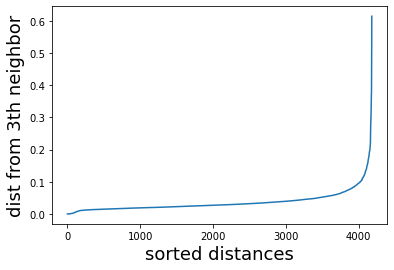

K = 3 
k-dist del 4000-esimo punto 0.09532973277593328: 
k-dist del 3000-esimo punto 0.03906947715479595: 


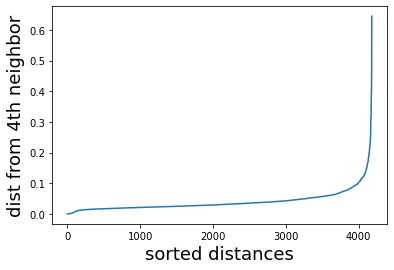

K = 4 
k-dist del 4000-esimo punto 0.10301721023277231: 
k-dist del 3000-esimo punto 0.04272464601404129: 


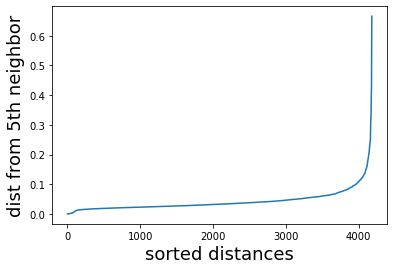

K = 5 
k-dist del 4000-esimo punto 0.10904869453847389: 
k-dist del 3000-esimo punto 0.04618436261512973: 


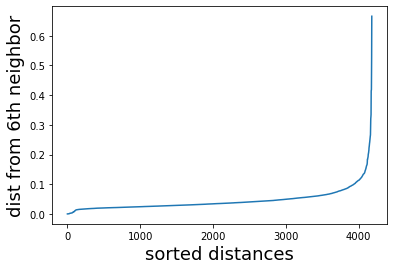

K = 6 
k-dist del 4000-esimo punto 0.11319934798887489: 
k-dist del 3000-esimo punto 0.04928002040573945: 


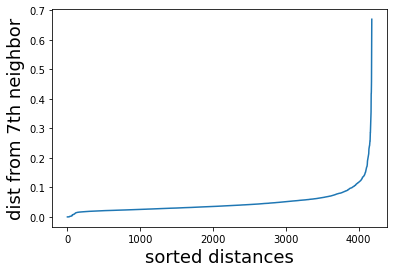

K = 7 
k-dist del 4000-esimo punto 0.11781491420691578: 
k-dist del 3000-esimo punto 0.05177512865260766: 


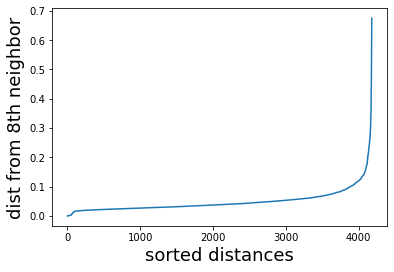

K = 8 
k-dist del 4000-esimo punto 0.12097831816513548: 
k-dist del 3000-esimo punto 0.053753474261420534: 


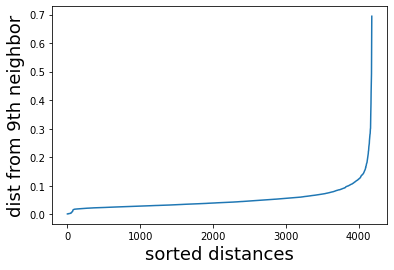

K = 9 
k-dist del 4000-esimo punto 0.12324418144579295: 
k-dist del 3000-esimo punto 0.055553893838586096: 


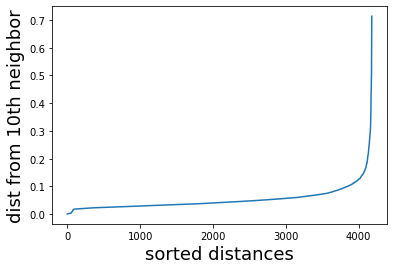

K = 10 
k-dist del 4000-esimo punto 0.1263548562164362: 
k-dist del 3000-esimo punto 0.05697601106385916: 


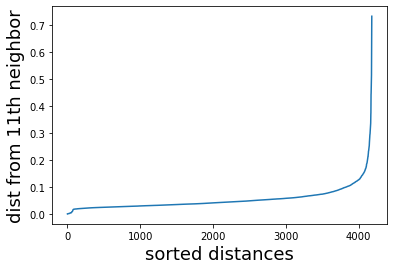

K = 11 
k-dist del 4000-esimo punto 0.12782018147196272: 
k-dist del 3000-esimo punto 0.05875140830130593: 


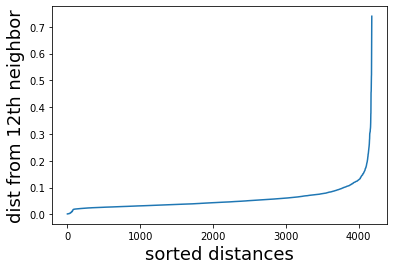

K = 12 
k-dist del 4000-esimo punto 0.12863481486582193: 
k-dist del 3000-esimo punto 0.0606296753600267: 


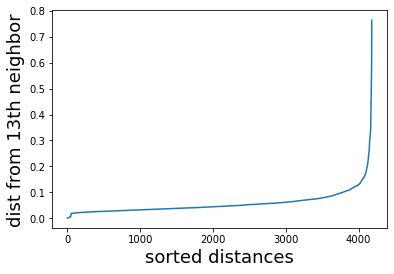

K = 13 
k-dist del 4000-esimo punto 0.13129404547904724: 
k-dist del 3000-esimo punto 0.06260183358740883: 


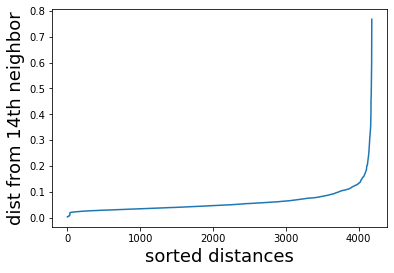

K = 14 
k-dist del 4000-esimo punto 0.13247346340234506: 
k-dist del 3000-esimo punto 0.06389794755279185: 


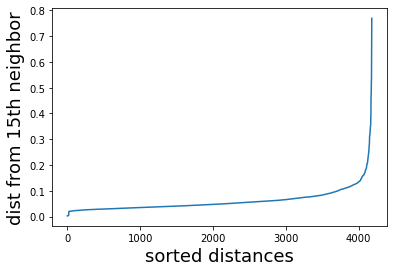

K = 15 
k-dist del 4000-esimo punto 0.13516582410312658: 
k-dist del 3000-esimo punto 0.06576821481266096: 


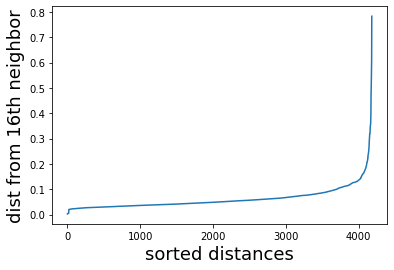

K = 16 
k-dist del 4000-esimo punto 0.13599135559723624: 
k-dist del 3000-esimo punto 0.06710774885227397: 


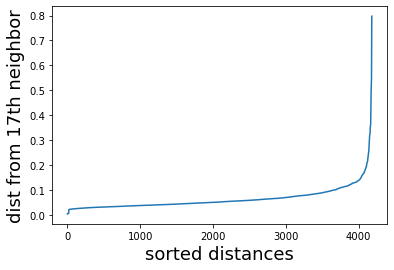

K = 17 
k-dist del 4000-esimo punto 0.1375160673993406: 
k-dist del 3000-esimo punto 0.06886490806353533: 


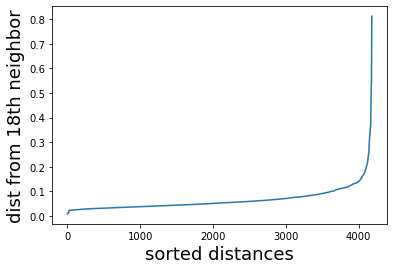

K = 18 
k-dist del 4000-esimo punto 0.14026581723322354: 
k-dist del 3000-esimo punto 0.07030241472335118: 


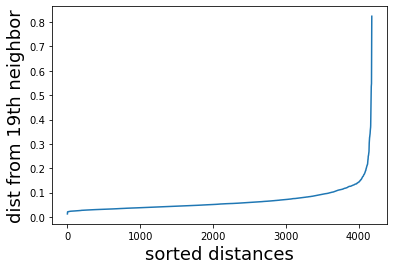

K = 19 
k-dist del 4000-esimo punto 0.1430395594469958: 
k-dist del 3000-esimo punto 0.0715003790703871: 


In [19]:
for k in range(2,20):

    
    kth_distances = list()
    for d in dist:
        index_kth_distance = np.argsort(d)[k] #indice della distanza che ordinata è in posizione k
        kth_distances.append(d[index_kth_distance])

        
    kth_distances=sorted(kth_distances)

    
    plt.plot(range(0, len(kth_distances)), kth_distances)
    plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
    plt.xlabel('sorted distances', fontsize=18)
    plt.show()
    
    print("K = %d " % k)
    print("k-dist del 4000-esimo punto %s: " % kth_distances[4000])
    print("k-dist del 3000-esimo punto %s: " % kth_distances[3000])

# Subtask 4.2: cluster analysys

In [20]:
dbscan = DBSCAN(eps=0.1209, min_samples=8)
dbscan.fit(X)

print('Silhouette %s' % metrics.silhouette_score(X, dbscan.labels_))

Silhouette 0.3852764223360608


In [21]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([  86, 4071,   23], dtype=int64))

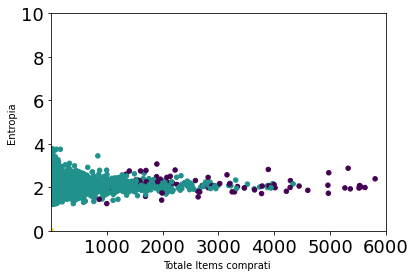

In [22]:
plt.scatter(CICopyDensityBased['I'], CICopyDensityBased['avg_bought'],s=20,c=dbscan.labels_)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(5, 6000)
plt.ylim(0,10)
plt.xlabel('Totale Items comprati ')
plt.ylabel('Entropia')
plt.show()

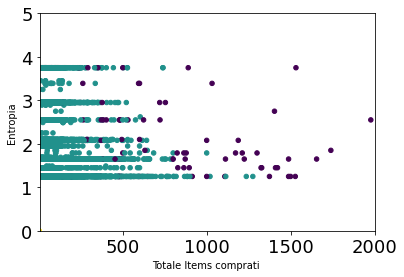

In [490]:
plt.scatter(CICopyDensityBased['Imax'], CICopyDensityBased['most_bought_cost'],s=20,c=dbscan.labels_)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(5, 2000)
plt.ylim(0,5)
plt.xlabel('Totale Items comprati ')
plt.ylabel('Entropia')
plt.show()

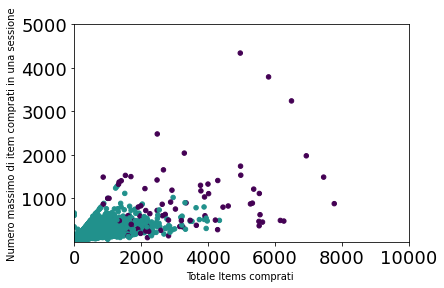

In [23]:
plt.scatter(CICopyDensityBased['I'], CICopyDensityBased['Imax'],s=20,c=dbscan.labels_)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(-1, 10000)
plt.ylim(1,5000)
plt.xlabel('Totale Items comprati ')
plt.ylabel('Numero massimo di item comprati in una sessione')
plt.show()

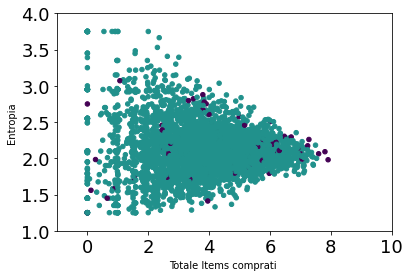

In [492]:
plt.scatter(CICopyDensityBased['E'], CICopyDensityBased['avg_bought'],s=20,c=dbscan.labels_)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(-1, 10)
plt.ylim(1,4)
plt.xlabel('Totale Items comprati ')
plt.ylabel('Entropia')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

labels = list(set(customer_indicators.columns) - {"best_country", "hour", "month"})

customer_indicators[labels] = scaler.fit_transform(customer_indicators[labels].fillna(0).values)
customer_indicators

## Principal component analisys

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X = pca.fit_transform(customer_indicators.values)
X

array([[17.12494777, -0.44870276,  2.05071426],
       [15.2449771 , -4.23178876, -3.1567808 ],
       [ 9.11996068,  4.57500242,  3.9820809 ],
       ...,
       [-1.70555197,  4.90852994, -1.37904187],
       [-1.84483961, -4.12321034, -0.7194167 ],
       [-1.70754461,  1.94714675, -2.48766483]])

<<<<<<< LOCAL CELL DELETED >>>>>>>
## Hierarchical clustering

Si sperimentano varie invocazioni dell'oggetto `AgglomerativeClustering` e come i clusters generati cambiano al variare delle metriche adottate.

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()

# X = scaler.fit_transform(customer_indicators[["I", "Iu", "Imax", "returned_items", "returning", "baskets", "E", "hour", "month"]].values)

X = customer_indicators[["I", "Iu", "Imax", "baskets", "E", "hour", "month"]].values

In [41]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=5, linkage="ward")
complete = AgglomerativeClustering(n_clusters=5, linkage="complete")
average = AgglomerativeClustering(n_clusters=5, linkage="average")
single = AgglomerativeClustering(n_clusters=5, linkage="single")

ward.fit_predict(X)
complete.fit_predict(X)
average.fit_predict(X)
single.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

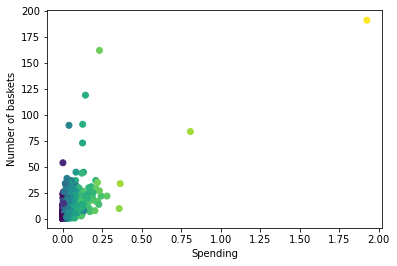

In [43]:
plt.xlabel("Spending")
plt.ylabel("Number of baskets")
plt.scatter(
    x = customer_indicators["spending"],
    y = customer_indicators["baskets"],
    c = customer_indicators["E"]
)

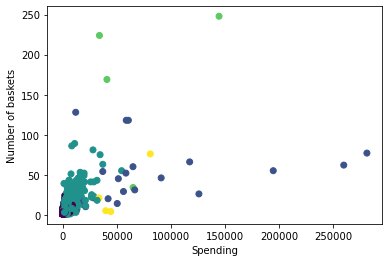

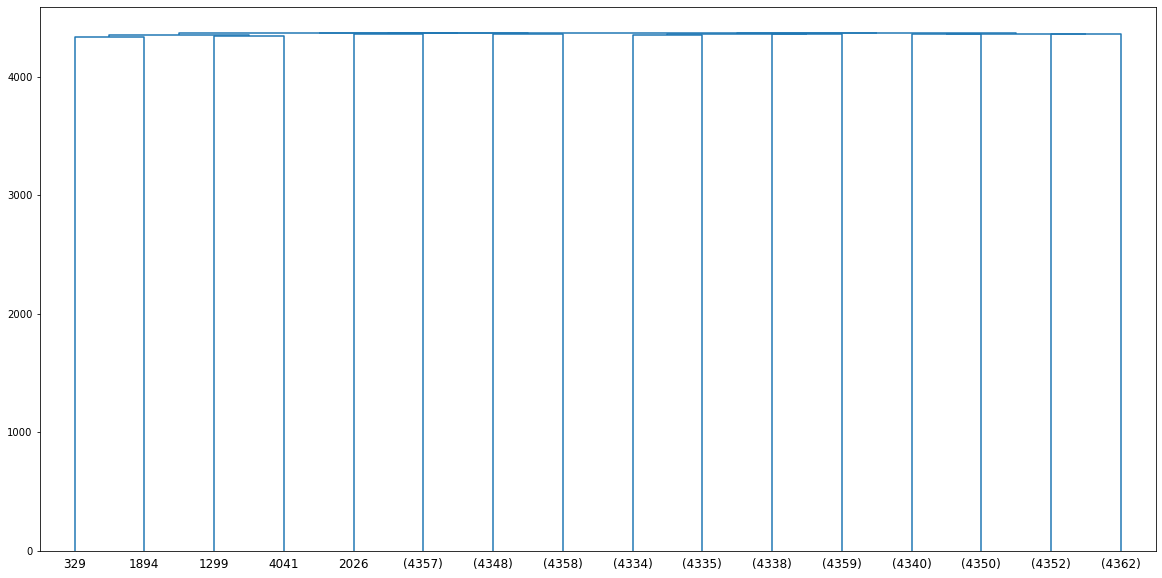

In [10]:
# Ward
plt.xlabel("Spending")
plt.ylabel("Number of baskets")
plt.scatter(
    x = customer_indicators["spending"],
    y = customer_indicators["baskets"],
    c = ward.labels_
)
plt.figure(figsize=(20, 10))
plot_dendrogram(ward, truncate_mode='level', p=3)

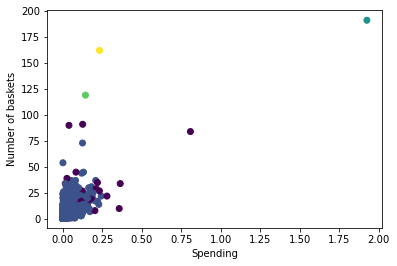

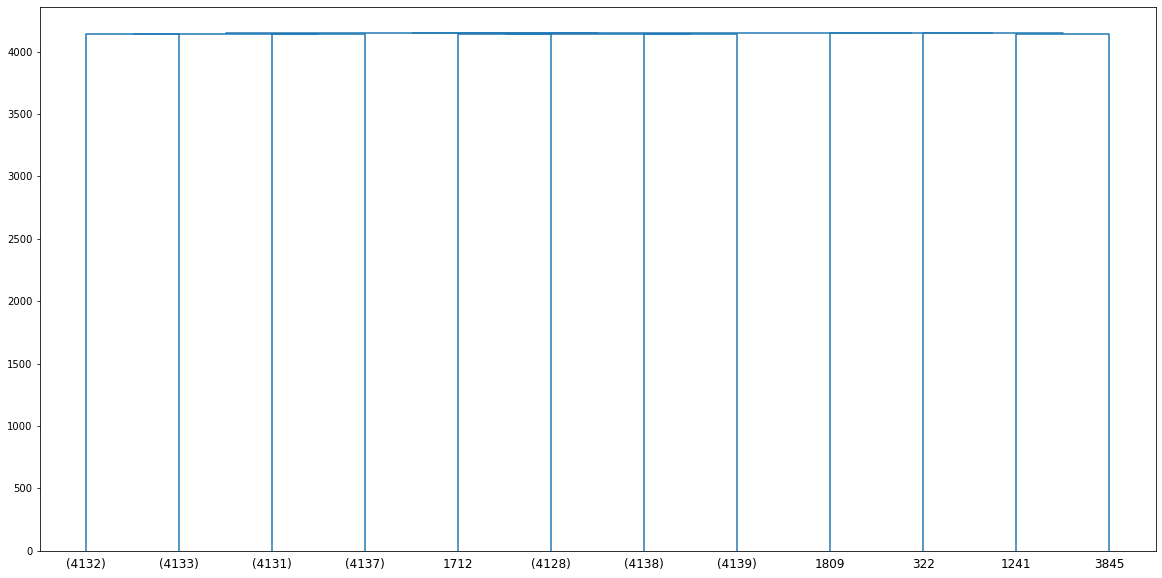

In [44]:
# Complete
plt.xlabel("Spending")
plt.ylabel("Number of baskets")
plt.scatter(
    x = customer_indicators["spending"],
    y = customer_indicators["baskets"],
    c = complete.labels_
)
plt.figure(figsize=(20, 10))
plot_dendrogram(complete, truncate_mode='level', p=3)

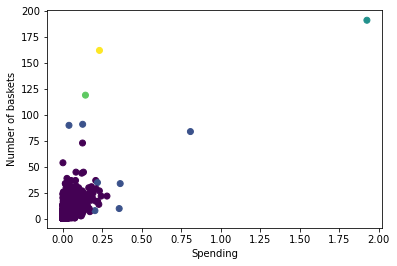

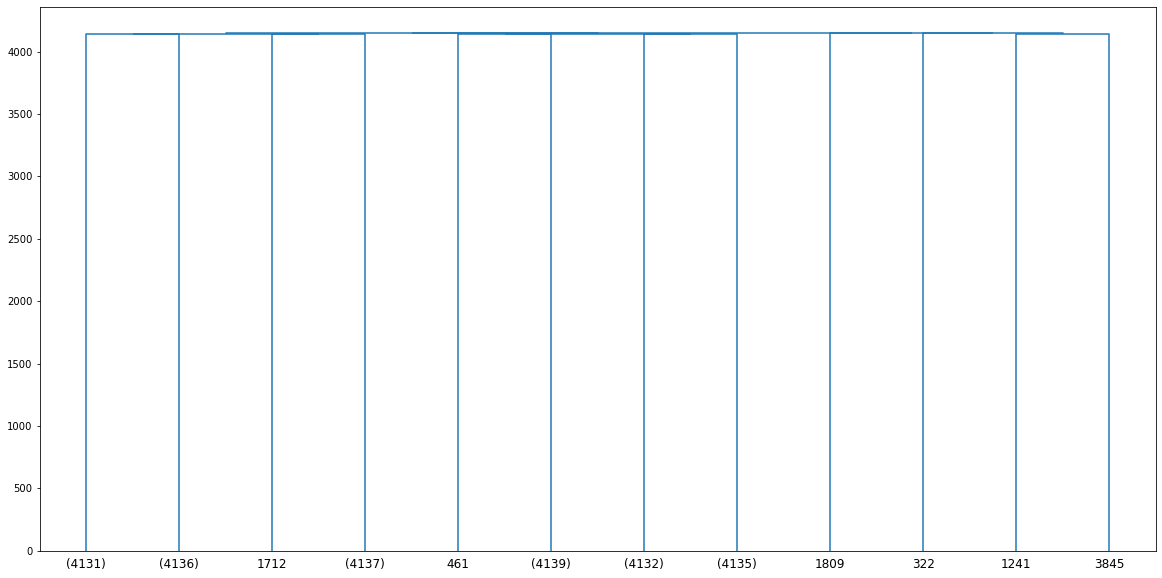

In [45]:
# Average
plt.xlabel("Spending")
plt.ylabel("Number of baskets")
plt.scatter(
    x = customer_indicators["spending"],
    y = customer_indicators["baskets"],
    c = average.labels_
)
plt.figure(figsize=(20, 10))
plot_dendrogram(average, truncate_mode='level', p=3)

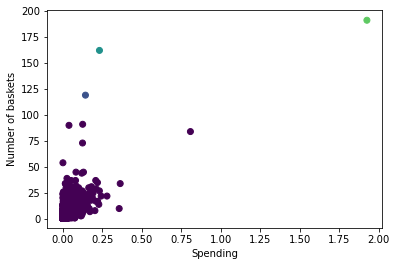

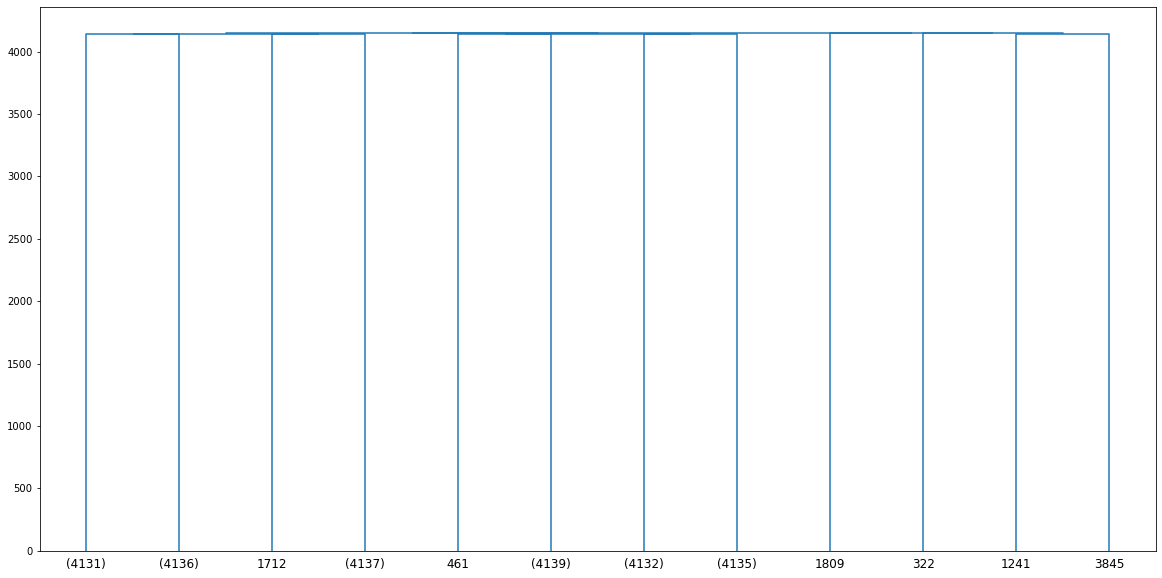

In [46]:
# Single
plt.xlabel("Spending")
plt.ylabel("Number of baskets")
plt.scatter(
    x = customer_indicators["spending"],
    y = customer_indicators["baskets"],
    c = single.labels_
)
plt.figure(figsize=(20, 10))
plot_dendrogram(average, truncate_mode='level', p=3)

## Principal Component Analysis

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
Y = pca.fit_transform(X)
plt.scatter(x = Y[:, 0], y = Y[:, 1], c=Y[:, 2])

NameError: name 'X' is not defined

In [ ]:
customer_indicators.sort_values(by=["hour", "month"])

In [48]:
#<<<<<<< REMOTE CELL DELETED >>>>>>>
def hierarchical_clusterize(X, linkage):
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=linkage)
    model = model.fit(X)
    plt.figure(figsize=(10, 10))
    # plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode='level', p=3)
    plt.xlabel(f"{linkage} linkage")
    plt.show()
    plt.scatter(
        x = customer_indicators["I"],
        y = customer_indicators["Iu"],
        c = model.labels_
    )


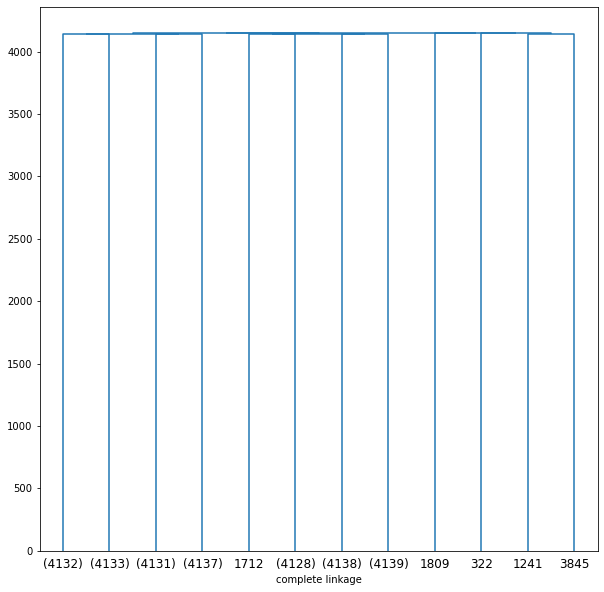

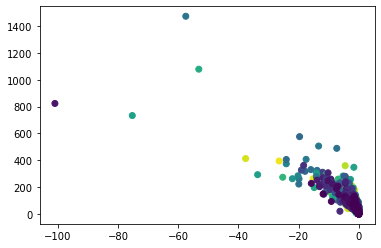

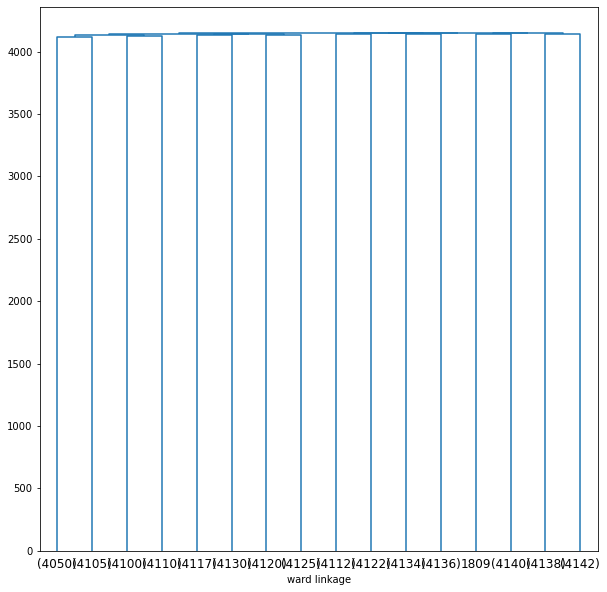

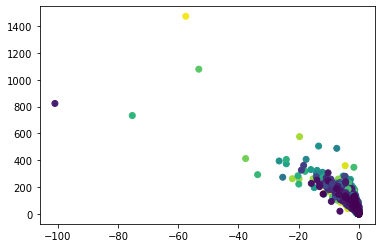

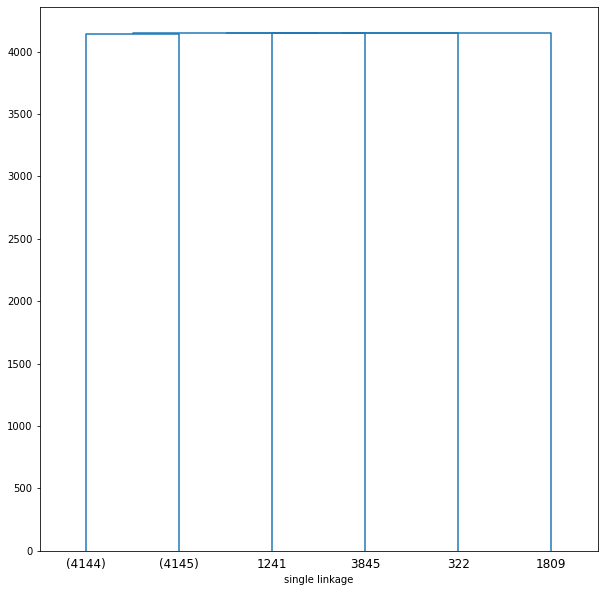

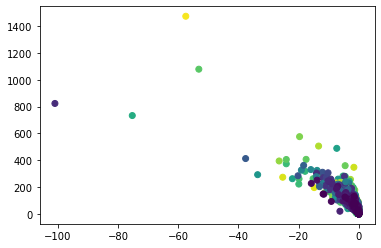

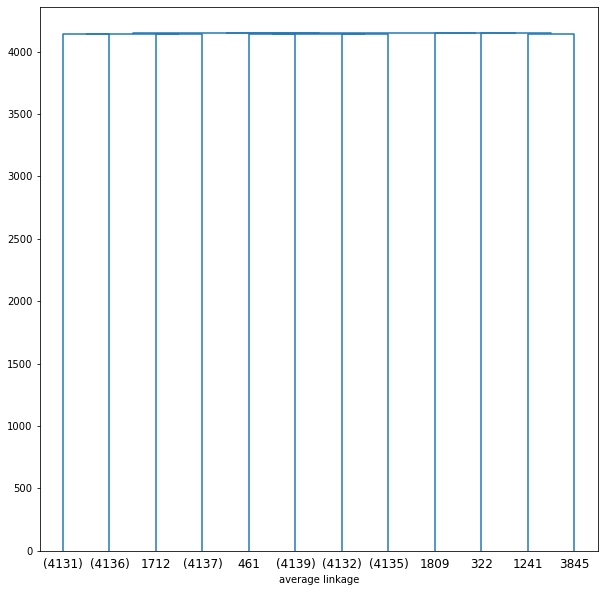

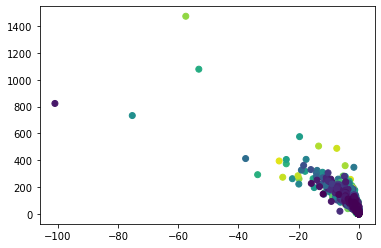

In [49]:
for linkage in {"ward", "complete", "average", "single"}:
    hierarchical_clusterize(X, linkage)

## X-Means

Si utilizza l'algoritmo contenuto nella libreria `PyClustering`, che non necessita di specificare un numero di clusters.

In [50]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(X, amount_initial_centers).initialize()

# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 20.
xmeans_instance = xmeans(X, initial_centers, 6)
xmeans_instance.process()

# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()
# Print total sum of metric errors
print("Total WCE:", xmeans_instance.get_total_wce())
# Visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, X.tolist())
visualizer.append_cluster(centers, None, marker='*', markersize=10)
visualizer.show()

Total WCE: 1365664.7344323078


ValueError: Only objects with size dimension 1 (1D plot), 2 (2D plot) or 3 (3D plot) can be displayed. For multi-dimensional data use 'cluster_visualizer_multidim'.

In [38]:
len(clusters)

6

count    4150.000000
mean        0.017768
std         0.041917
min         0.000000
25%         0.002453
50%         0.007361
75%         0.020854
max         1.924765
Name: spending, dtype: float64
0.003680270485936822
0.014719554245512814
                   I  Iu  spending      Imax    best_country  max_cost  \
CustomerID                                                               
12347.0    -1.459222  86  0.068700 -0.012388         Iceland  0.221262   
12349.0    -0.908308  63  0.025762 -0.908308           Italy  0.221198   
12350.0     0.048635  15  0.015948  0.048635          Norway  0.221141   
12352.0    -1.436998  55  0.028215 -0.051936          Norway  0.221138   
12357.0    -0.193893  64  0.050303 -0.193893     Switzerland  0.221269   
...              ...  ..       ...       ...             ...       ...   
18257.0    -1.699709  88  0.015948  0.005548  United Kingdom  0.221158   
18259.0    -0.090974  19  0.017177  0.005548  United Kingdom  0.221198   
18260.0    -1.68487

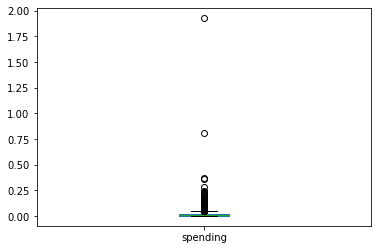

In [51]:
customer_indicators["spending"].plot.box()
print(customer_indicators["spending"].describe())
print(customer_indicators["spending"].quantile(0.33))
print(customer_indicators["spending"].quantile(0.66))

x=customer_indicators

print(x[x["spending"]>0.014719554245512814])

In [56]:
def target_label(row):
    first_third = customer_indicators["spending"].quantile(0.33)
    second_third = customer_indicators["spending"].quantile(0.66)
    if (row["spending"] <= first_third):
        return 1
    elif (row["spending"] > first_third and row["spending"] <= second_third):
        return 2
    return 3

customer_indicators["label"] = customer_indicators.apply(target_label, axis=1)

In [57]:
customer_indicators

,I,Iu,spending,Imax,best_country,max_cost,min_cost,avg_bought,avg_returned,hour,month,baskets,E,label
CustomerID,,,,,,,,,,,,,,
12347.0,-1.459222,86,0.068700,-0.012388,Iceland,0.221262,0.221354,0.221136,0.221180,14,7,7,5.450212,3
12348.0,-0.020387,1,0.000000,-0.020387,Finland,NaN,0.221899,NaN,0.221899,19,12,1,0.000000,1
12349.0,-0.908308,63,0.025762,-0.908308,Italy,0.221198,0.221418,0.221132,0.221195,9,11,1,4.392317,3
12350.0,0.048635,15,0.015948,0.048635,Norway,0.221141,0.221158,0.221131,0.221137,16,2,1,3.700440,3
12352.0,-1.436998,55,0.028215,-0.051936,Norway,0.221138,0.221899,0.221129,0.221234,14,9,7,4.055958,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,-0.268701,10,0.000000,-0.268701,United Kingdom,NaN,0.221298,NaN,0.221195,9,7,1,0.000000,1
18281.0,-0.006841,5,0.003680,-0.006841,United Kingdom,0.221108,0.221150,0.221108,0.221141,10,12,1,1.584963,1
18282.0,-0.187801,9,0.001227,-0.077224,United Kingdom,0.221108,0.221354,0.221108,0.221190,11,2,2,0.000000,1
